In [1]:
import pandas as pd

In [3]:
#importing the data
data = pd.read_csv('StudentsPerformance.csv')

In [5]:
#data pre-processing
#check for any null values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#creating file named clean_data
data.to_csv('clean_data.csv')

In [6]:
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


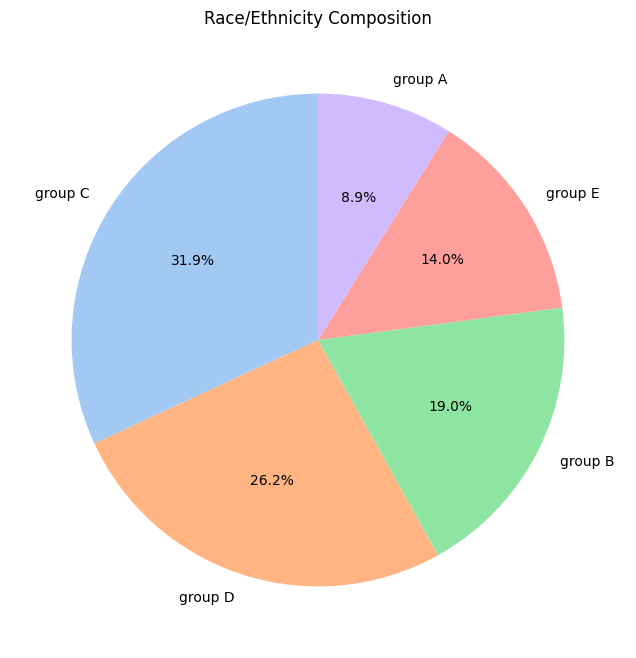

In [13]:
#pie chart of % of race/ethnicity composition
plt.figure(figsize=(8, 8))
data['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Race/Ethnicity Composition')
plt.ylabel('')
plt.show()

**Here we can see Group C type of people are more in the data.**

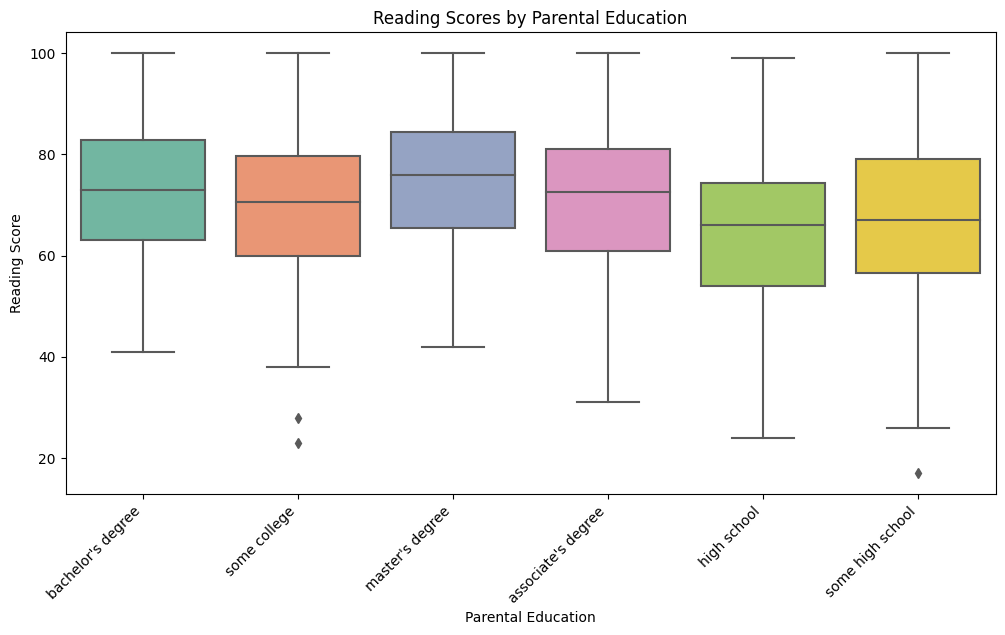

In [15]:
# reading scores by parental education
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='parental level of education', y='reading score', palette='Set2')
plt.title('Reading Scores by Parental Education')
plt.xlabel('Parental Education')
plt.ylabel('Reading Score')
plt.xticks(rotation=45, ha='right')
plt.show()

**Reading scores are more for the students if their parents had studied masters degree**

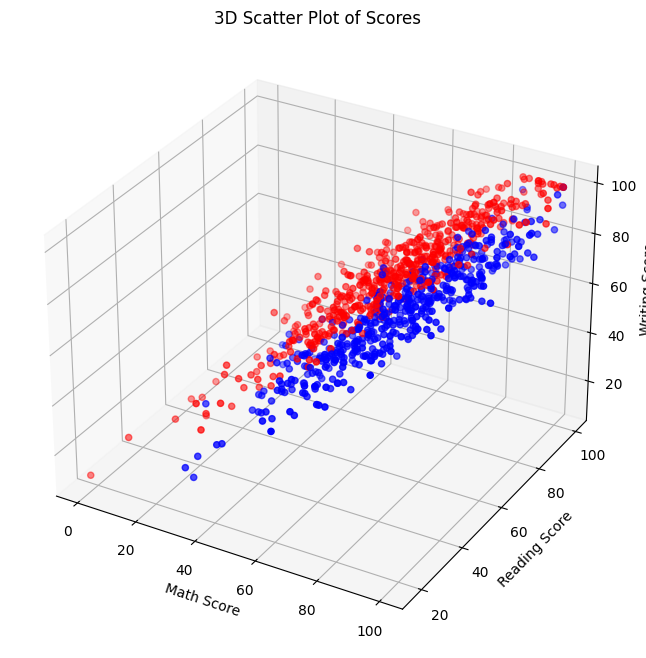

In [19]:
#3d scatter plot of scores

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['math score'], data['reading score'], data['writing score'], c=data['gender'].map({'female': 'red', 'male': 'blue'}), marker='o')
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
ax.set_title('3D Scatter Plot of Scores')
plt.show()


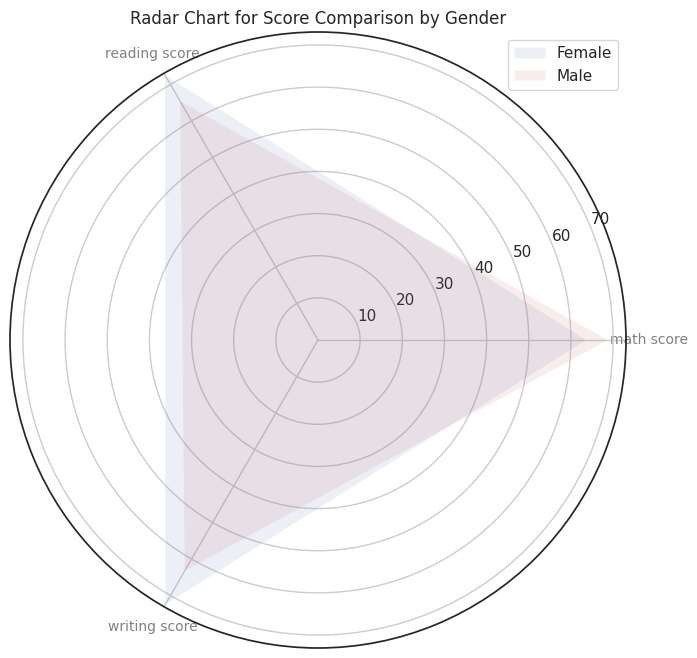

In [25]:
import numpy as np

# Calculate average scores by gender
avg_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Radar chart parameters
categories = list(avg_scores.columns[1:])
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Create the radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, avg_scores.loc[0, categories].values.tolist() + avg_scores.loc[0, categories].values.tolist()[:1], 'b', alpha=0.1, label='Female')
ax.fill(angles, avg_scores.loc[1, categories].values.tolist() + avg_scores.loc[1, categories].values.tolist()[:1], 'r', alpha=0.1, label='Male')
plt.xticks(angles[:-1], categories, color='grey', size=10)
plt.title('Radar Chart for Score Comparison by Gender')
plt.legend(loc='upper right')
plt.show()

**Reading score and writing score is more for females compared to males and math score is more for males compared to females**

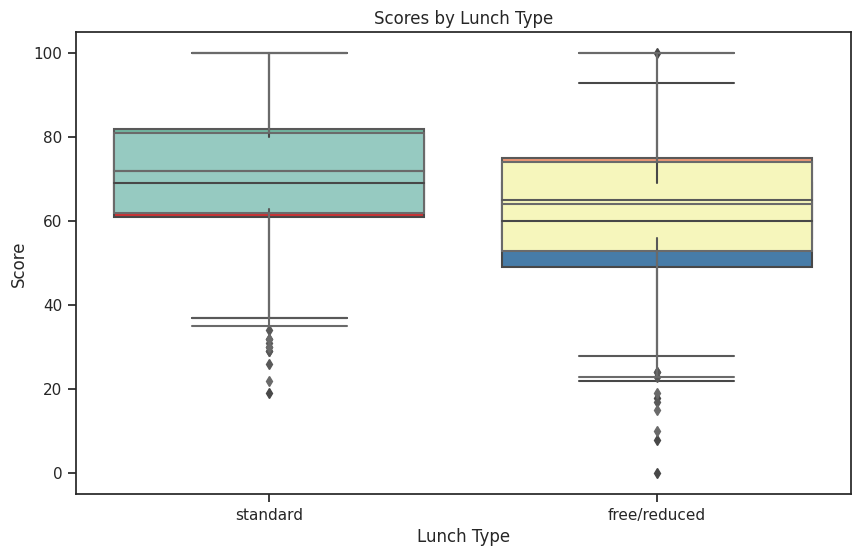

In [32]:
# Create a box plot
# Scores Distribution by Lunch Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='math score', data=data, palette='Set1')
sns.boxplot(x='lunch', y='reading score', data=data, palette='Set2')
sns.boxplot(x='lunch', y='writing score', data=data, palette='Set3')
plt.title('Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Score')
plt.show()

**There is a visisble difference in the scores of students based on type of food they eat. The students who eat standard type of food are scoring better thean the students who eat free/reduced.**